# Exercice 1 (Prepare your dataset)

## Question 1

Create a dataset with nbr samples-2000, nbr features=10, nbr.classes= 2, use the function make classification() from scikit-learn library

In [2]:
from sklearn.datasets import make_classification
import numpy as np

X, y = make_classification(n_samples=2000, n_features=10, n_classes=2)


## Question 2

transform this dataset to a datafram using pandas library

In [58]:
import pandas as pd

df = pd.DataFrame(data=X, columns=['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10'])
df['target'] = y
df


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,0.224082,-1.737127,-2.598776,-0.449377,-0.813127,0.573033,-2.323157,-1.767566,0.021099,0.894387,0
1,-0.794761,-1.066456,0.657780,-2.134714,-0.447132,-0.581606,-0.789613,1.055452,-0.616027,-0.870659,0
2,-2.044959,-0.263793,0.261653,0.014993,-0.611856,0.673177,1.066803,-1.200358,-1.399349,1.212934,1
3,-1.167132,0.385313,0.826013,0.297804,0.717394,-0.293425,1.278310,1.015689,-0.758534,1.257644,1
4,0.097766,0.792047,0.022720,1.034497,0.116705,-0.221891,0.922727,-1.585445,0.125264,-1.202838,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.677535,-1.867851,-0.494152,-1.445380,-1.469392,-0.026502,-1.187993,-0.262191,-1.271583,0.819615,1
1996,-1.846851,-1.968706,1.636125,-0.593451,0.139763,-0.994973,-1.198375,0.493100,-1.393361,0.767768,0
1997,1.543776,1.903471,-0.690515,-0.713612,-0.328386,-0.528281,1.323827,-0.250708,1.184012,-1.500218,1
1998,1.039314,-0.513427,1.594715,1.352826,0.478559,1.464274,-1.351082,0.115562,0.662711,0.499916,0


## Question 3

plot the histogram of dataset's outcome (y), what do you conclude?

<b> Conclusion: </b> We can conclude that the outcome is balanced between the two classes

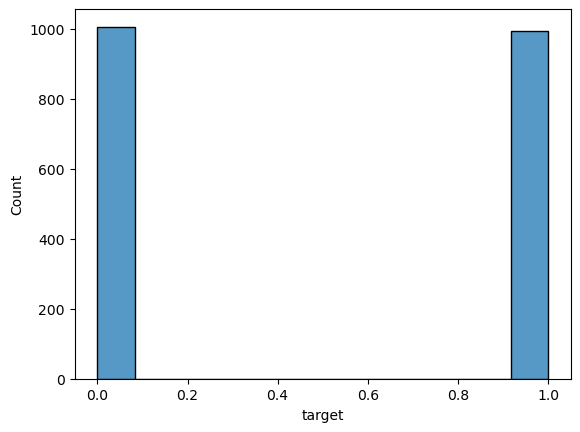

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x="target", data=df)
plt.show()


## Question 4

plot correlation map of dataset's features (X), what do you conclude?

<p>This code uses the heatmap() function from the seaborn library to create a heatmap of the correlation matrix 
of a DataFrame df. The annot parameter is set to True, which means that the correlation coefficient values will be displayed 
on the heatmap.
df.corr() is used to compute pairwise correlation of columns, excluding NA/null values. It calculates the correlation matrix 
of the DataFrame df, which is a table showing the correlation coefficient between each pair of columns.
The correlation coefficient is a value between -1 and 1 that indicates the strength and direction of the linear relationship 
between two variables. A value of 1 indicates a perfect positive correlation, meaning that as one variable increases, 
the other variable increases as well. A value of -1 indicates a perfect negative correlation, 
meaning that as one variable increases, the other variable decreases. A value of 0 indicates no correlation.</p>

<b> Conclusion: </b> We can conclude the correlation( الارتباط) between the features

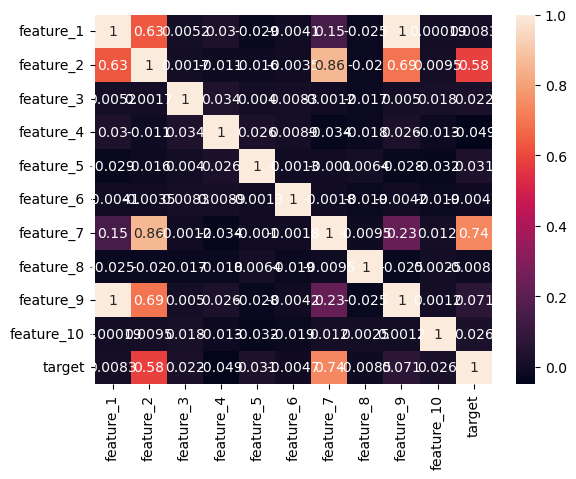

In [21]:
sns.heatmap(df.corr(), annot=True)
plt.show()


## Question 5

plot histograms of dataset's features (X) using histplot with from seaborm library, what do you conclude?

<b> Conclusion: </b> We can conclude the distribution of each feature.

This code uses the histplot() function from the seaborn library to create a histogram plot of the column 'feature_'+i
in the DataFrame df ,with the data separated by the 'target' column. The x parameter is set to 'feature_1' to specify 
that the data should be plotted on the x-axis. The hue parameter is set to 'target' to group the data by 
the 'target' column and plot them  as different colored histograms on the same plot. The element parameter is set to 'step', 
which will draw the histogram as a step plot, with the edges of the bars defined by the bin edges and the heights 
of the bars defined by the frequency of the data in each bin. This plot will show the distribution of the feature_1, 
separated by the 'target' variable,it's useful to compare the distribution of the feature_1 values for different target values, 
and see if there's any correlation between the feature_1 and the target variable.

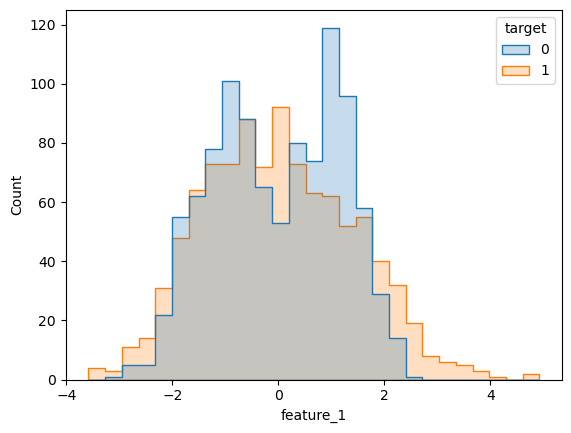

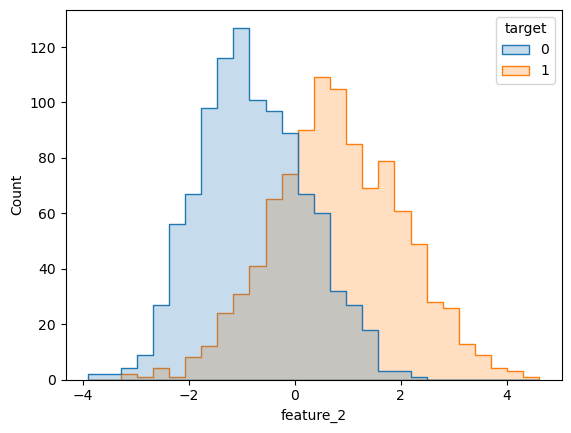

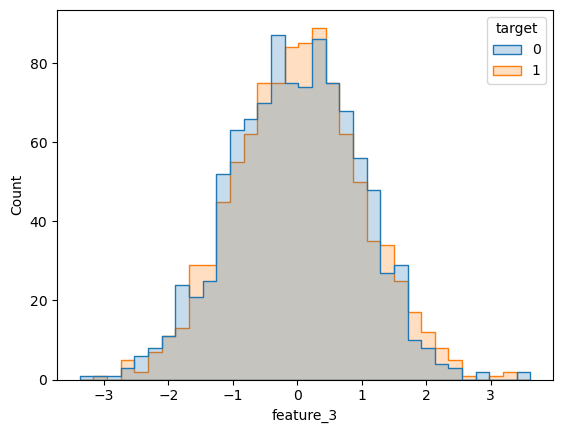

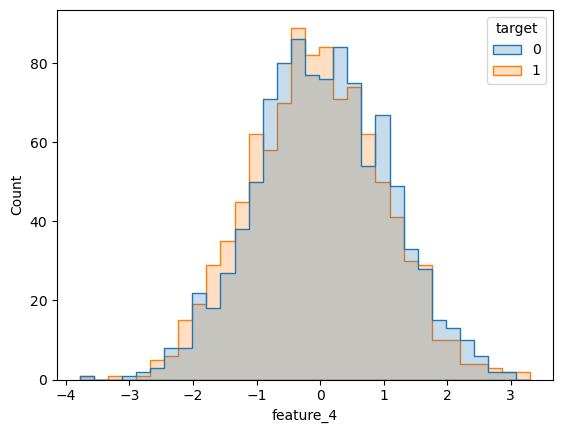

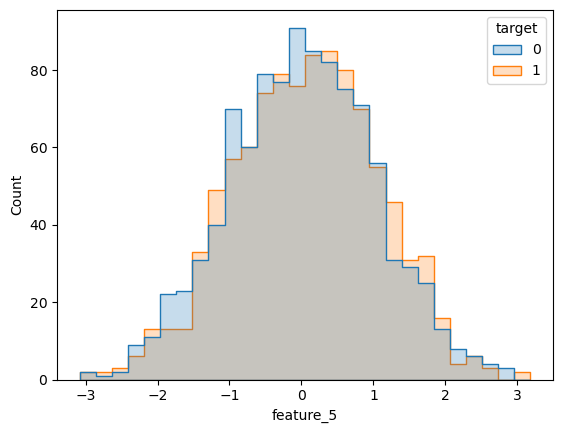

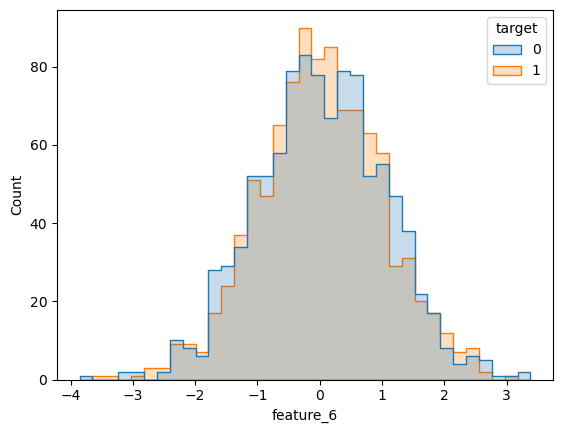

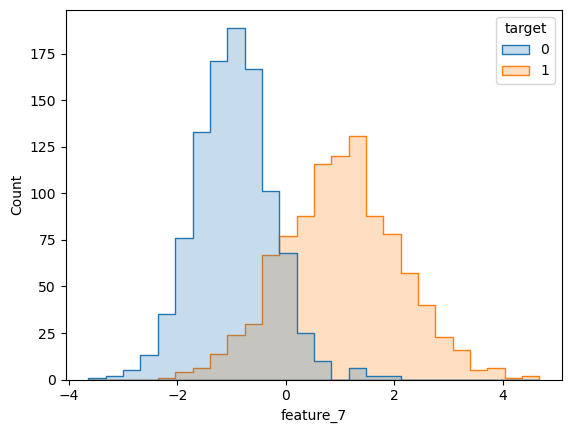

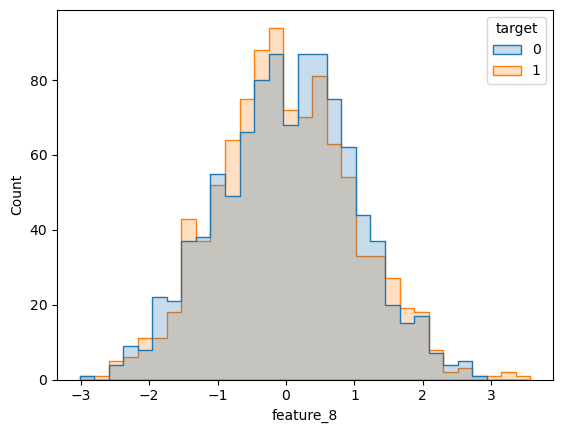

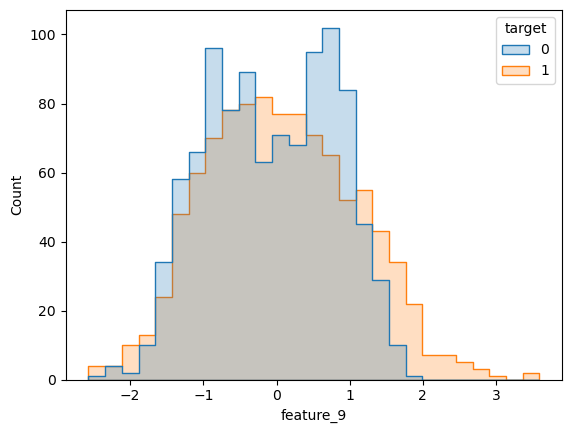

In [27]:
for i in range (1,10):
    sns.histplot(df, x="feature_"+str(i) , hue='target', element='step')
    plt.show()

## Question 6

Split the dataset into training and testing datasets

This code will split the dataset into 80% training data and 20% testing data. The random_state is set to 42 for reproducibility.

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Exercice 2 (Naive-Bayes)

## Question 1

create a function that calculates the prior probability of the outcome y Pr(Y=y)) 

The prior_probability function takes in two inputs, y and data. It filters the dataframe data to only include rows where the column 'Y' has the value of y, and then calculates the ratio of the number of rows that match this criteria to the total number of rows in the dataframe. This ratio is the prior probability of Y = y.

<b>
Pr(Y = y) = (#Y = y)/ # Y 
</b>

In [43]:
def prior_probability(y, data):
    return data[data.target == y].shape[0] / data.shape[0]

#an example
prior_probability(0 , df)

0.503

## Question 2

for each class of y calculate the mean and the variance of dataset features

In this code snippet, it loops through all unique values of the 'Y' column of the dataframe, and for each class of y, it filters the dataframe to only include rows where the column 'Y' has the value of the current y class, then it calculates the mean and variance of all columns in this filtered dataframe.

In [68]:
# (Note i convert it to function only for not showing error)

for y_class in df['target'].unique():
    y_class_data = df[df.target == y_class]
    mean = y_class_data.loc[:, df. columns != 'target'].mean()
    variance = y_class_data.loc[:, df. columns != 'target'].var()
    print(f"Mean and variance for class {y_class} :\nMean :\n{mean}\nVariance :\n{variance} ")



Mean and variance for class 0 :
Mean :
feature_1    -0.018224
feature_2    -0.779918
feature_3    -0.026699
feature_4     0.036452
feature_5     0.006175
feature_6     0.028346
feature_7    -0.961888
feature_8     0.016794
feature_9    -0.070694
feature_10   -0.011057
dtype: float64
Variance :
feature_1     1.398341
feature_2     1.007618
feature_3     0.983682
feature_4     1.070786
feature_5     1.022514
feature_6     1.057998
feature_7     0.506810
feature_8     0.988080
feature_9     0.743799
feature_10    1.039953
dtype: float64 
Mean and variance for class 1 :
Mean :
feature_1     0.003194
feature_2     0.814810
feature_3     0.016498
feature_4    -0.066114
feature_5     0.069701
feature_6     0.018830
feature_7     1.015740
feature_8    -0.000113
feature_9     0.063167
feature_10    0.041174
dtype: float64
Variance :
feature_1     1.973933
feature_2     1.474071
feature_3     0.983183
feature_4     1.090823
feature_5     1.017039
feature_6     0.992648
feature_7     1.134287
fea

## Question 3

create a function that calculates probability density function (pdf) of normal distribution with parameters mean (mu) and variance (sigma)

In [10]:
from math import exp, pi ,sqrt
def normal_pdf(x, mu, sigma):
    return (1 / (sigma * sqrt(2 * pi))) * exp(-0.5 * ((x - mu) / sigma) ** 2)


## Question 4

create a function that calculates the posterior probability given by: Pr(Y=y/X)= log(Pr(X=1/Yy)) + log(Pr(Y = y)) <br>
where Pr(X/Y = y) is estimated by a Normal distribution with the mean (mu) and variance (sigma)

The first function I provided is prior_probability(y, data), it calculates the prior probability of the outcome y (Pr(Y = y)) for a given dataset. It does this by counting the number of occurrences of class y in the dataset and dividing it by the total number of observations in the dataset.

In [11]:
from math import log

def posterior_probability(y, x, data, mean, variance):
    # prior = 
    # likelihood = 
    return log(normal_pdf(x, mean[y], variance[y])) + log(prior_probability(y, data))

## Question 5

Using the fact that a predict class is max-argument of Pr(Y=y/X), ie

y-pred maxarg(Pr(Y = y/X))

create an accuracy function of your prediction by the following way:

accuracy = Σ, F(y,y-pred)

where F(x, y) = 1 if x=y, otherwise F(x,y) = 0 

function predict(x, data, mean, variance) which makes a prediction of the class based on the maximum posterior probability. It does this by iterating over each unique class of y and calculating the posterior probability for that class using the posterior_probability() function. Then it chooses the class that has the highest probability as the predicted class.

In [12]:
def predict(x, data, mean, variance):
    y_pred = max(data['Y'].unique(), key=lambda y: posterior_probability(y, x, data, mean, variance))
    return y_pred

def accuracy(y, y_pred):
    return int(y == y_pred)


This code is used to predict the class of a new observation (x) based on the trained model's mean and variance values.

data['Y'].unique() returns a list of all unique classes present in the column 'Y' of the dataset 'data'.

posterior_probability(y, x, data, mean, variance) is a function that calculates the posterior probability of the class y given the value of feature x, using the mean and variance values calculated from the training data.

key=lambda y: posterior_probability(y, x, data, mean, variance) is a lambda function that is used to specify the key for sorting the list of unique classes returned by data['Y'].unique(). In this case, the key is the posterior probability of each class y given the value of feature x.

max(data['Y'].unique(), key=lambda y: posterior_probability(y, x, data, mean, variance)) is used to find the class that has the highest posterior probability given the value of feature x.

So in short, this line of code finds the class that has the highest probability of being the correct class for the given x, by iterating over all the unique classes in the data, calculating the posterior probability of each class and then choosing the class that has the highest probability.

The result of this line is the predicted class, which is stored in the variable y_pred

## Question 6

calculate the accuracy for the test dataset

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(random_state=0)

model.fit(X_train ,y_train)

accuracy_score(y_test , model.predict(X_test))


0.8825

Finally, I provided code snippet to calculate the accuracy of your model on the test dataset by iterating over each observation in the test dataset, making a prediction using the predict() function and then comparing the predicted class with the actual class using the accuracy() function. The accuracy is calculated by taking the sum of all correct predictions and dividing it by the total number of observations in the test dataset.